In [47]:
import os.path
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib qt5

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
from pyofss import single_plot, map_plot, waterfall_plot, labels
from pyofss.field import energy

In [9]:
from pyofss.domain import lambda_to_omega
from pyofss.modules.nonlinearity import calculate_gamma
gamma_passive = calculate_gamma(2.7*(10**(-20)), 37.8, lambda_to_omega(1035))
gamma_active = calculate_gamma(2.7*(10**(-20)), 29, lambda_to_omega(1035))
print("gamma_passive = ", gamma_passive)
print("gamma_active = ", gamma_active)

gamma_passive =  4.336221744085291
gamma_active =  5.652040756083586



Generating single_plot...


<Figure size 432x288 with 0 Axes>

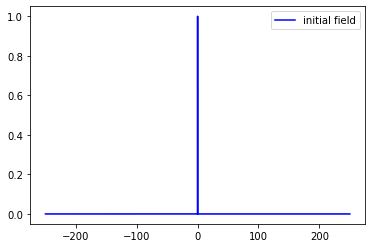

In [15]:
domain = Domain(samples_per_bit = 8192*4, bit_width = 500, total_bits = 1, centre_nu = lambda_to_nu(1035.0))
gaussian = Gaussian(name="initial_pulse", peak_power = 1, width = 0.05, C = 0, using_fwhm=True)
A = gaussian.generate(domain.t)
single_plot(domain.t, temporal_power(A), label="initial field")

before fibre 2.2661800709135967e-08
Caching linear factor
Caching linear factor
A_L1 =  0.1328812373395541  z =  0.0
1.1361541057185756
A_A =  0.14163877944735292  z =  0.0
A_N =  0.14163877944735292  z =  0.0
A_L1 =  0.14163946794867457  z =  5e-06
1.1361541057185756
A_A =  0.1509742163632466  z =  5e-06
A_N =  0.1509742163632466  z =  5e-06
A_L1 =  0.1509743393909201  z =  1e-05
1.1361541057185756
A_A =  0.16092429621660184  z =  1e-05
A_N =  0.16092429621660184  z =  1e-05
A_L1 =  0.1609237762434961  z =  1.5000000000000002e-05
1.1361541057185756
A_A =  0.17152944268144396  z =  1.5000000000000002e-05
A_N =  0.17152944268144393  z =  1.5000000000000002e-05
A_L1 =  0.17152819442610232  z =  2e-05
1.1361541057185756
A_A =  0.182832734896556  z =  2e-05
A_N =  0.182832734896556  z =  2e-05
A_L1 =  0.18283066463896752  z =  2.5e-05
1.1361541057185756
A_A =  0.19488008166009546  z =  2.5e-05
A_N =  0.19488008166009546  z =  2.5e-05
A_L1 =  0.1948770865010749  z =  3.0000000000000004e-05


<Figure size 432x288 with 0 Axes>

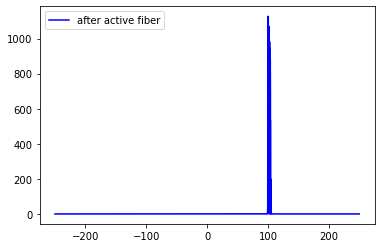

In [37]:
sys = System( domain, A)
print("before fibre", np.max(spectral_power(sys.field)))
sys.add(Filter(name="filter_1", width_nu=(Domain.vacuum_light_speed/(1040**2))*4, offset_nu=(lambda_to_nu(1040) - lambda_to_nu(1035)),
                 m=1, channel=0, using_fwhm=False, type_filt = "reflected"))
sys.add(Splitter(name="splitter", loss = 0.55))
sys.add(Fibre(name="passive_fibre", length=0.8, gamma=gamma_passive, beta=np.array([22.2, 63.8]), total_steps=2000, method='ss_symmetric', useAmplification = False))
sys.add(Fibre(name="active_fibre_1", length=0.5, gamma=gamma_active, beta=np.array([24.9, 59]), total_steps=2000, method='ss_symmetric', small_signal_gain = 25, E_sat = 9.15, useAmplification = True))
sys.add(Fibre(name="passive_fibre", length=0.8, gamma=gamma_passive, beta=np.array([22.2, 63.8]), total_steps=2000, method='ss_symmetric', local_error=0.005, useAmplification = False))
# sys.add(Splitter(name="splitter", loss = 0.6))
# sys.add(Filter(name="filter_2", width_nu=(Domain.vacuum_light_speed/(1030**2))*4, offset_nu=(lambda_to_nu(1030) - lambda_to_nu(1035)),
#                  m=1, channel=0, using_fwhm=False, type_filt = "reflected"))
# sys.add(Splitter(name="splitter", loss = 0.55))
# sys.add(Fibre(name="passive_fibre", length=0.8, gamma=gamma_passive, beta=np.array([22.2, 63.8]), self_steepening=False, raman_scattering=True,
#                  total_steps=100, method='ss_symmetric', local_error=0.005, useAmplification = False))
# sys.add(Fibre(name="active_fibre_2", length=2.5, gamma=gamma_active, beta=np.array([24.9, 59]), self_steepening=False, raman_scattering=True,
#                  total_steps=100, method='ss_symmetric', local_error=0.005, small_signal_gain = 25, E_sat = 36.6, useAmplification = True))
# sys.add(Fibre(name="passive_fibre", gamma=gamma_passive, beta=np.array([22.2, 63.8]), self_steepening=False, raman_scattering=True,
#                  total_steps=100, method='ss_symmetric', local_error=0.005, useAmplification = False))
# sys.add(Splitter(name="splitter", loss = 0.6))

# for i in range(10):      
sys.run()

single_plot(domain.t, temporal_power(sys.field), label="after active fiber")
print("after fibre", np.max(spectral_power(sys.field)))

In [48]:
energy(sys.field, domain.t)
plt.plot(domain.t, temporal_power(sys.field), label="after active fiber")
plt.show()


Generating single_plot...
after fibre 0.001056719078261872


<Figure size 432x288 with 0 Axes>

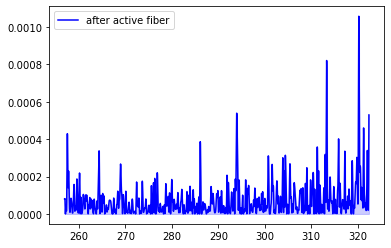

In [38]:
single_plot(domain.nu, spectral_power(sys.field), label="after active fiber")
print("after fibre", np.max(spectral_power(sys.field)))
# plt.plot(x1, y1, 'black', linewidth=2)

In [ ]:
sys.field